In [187]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import timeit

In [188]:
df = pd.read_csv('kc_house_data.csv')

L’exploration consiste à comprendre les données sur lesquelles on travaille en répondant à ces questions :
Quelles sont les caractéristiques principales du jeu de données ?
A quoi correspondent les features ?
Quelles valeurs prennent chaque feature ?
Quelles sont les corrélations entre les variables ?
Quelles seront les features utiles pour mon modèle ?
Etc.

Pour explorer vos données, vous pouvez utiliser des fonctions, des graphiques, des tableaux, etc.
Une bonne idée est d’utliser la latitude et la longitude pour positionner des data points sur une carte. En les combinant avec une troisième dimension comme le prix, il est possible de créer une visualisation qui nous permet de bien comprendre nos données.

In [189]:
df['sqft_living'].describe

<bound method NDFrame.describe of 0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64>

In [190]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

on en conclut que on n'a pas de donnée manquante

On Renomme les colonne

In [191]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [192]:
df.rename(columns = {'sqft_living':'interior_space'}, inplace = True)

In [193]:
df.rename(columns = {'sqft_lot':'land_space'}, inplace = True)

In [194]:
df.rename(columns = {'waterfront':'see_sea'}, inplace = True)

In [195]:
df.rename(columns = {'view':'view_qual'}, inplace = True)

In [196]:
df.rename(columns = {'condition':'cdt_score'}, inplace = True)

In [197]:
df.rename(columns = {'sqft_above':'space_above'}, inplace = True)


In [198]:
df.rename(columns = {'sqft_below':'space_below'}, inplace = True)

In [199]:
df.rename(columns = {'sqft_living15':'space_int_15'}, inplace = True)

In [200]:
df.rename(columns = {'sqft_lot15':'space_land_15'}, inplace = True)

In [201]:
df[df.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,...,grade,space_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,space_int_15,space_land_15


on en conclut que il n'y pas de valeur dupliquer

In [202]:
df['date'] = pd.to_datetime(df['date'])

In [203]:
df['year']=df.date.dt.year

In [204]:
df['month']=df.date.dt.month

In [205]:
df['house_age'] = abs(df['yr_renovated'] - df['yr_built'])

In [206]:
type(df['date'][2])

pandas._libs.tslibs.timestamps.Timestamp

rajouter une colonne mois

Pourquoi la colonne bathrooms peut prendre des décimals ?

In [207]:
df[df.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,...,yr_built,yr_renovated,zipcode,lat,long,space_int_15,space_land_15,year,month,house_age


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   interior_space  21613 non-null  int64         
 6   land_space      21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   see_sea         21613 non-null  int64         
 9   view_qual       21613 non-null  int64         
 10  cdt_score       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  space_above     21613 non-null  int64         
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr

In [209]:
df.corr()

,id,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,cdt_score,...,yr_built,yr_renovated,zipcode,lat,long,space_int_15,space_land_15,year,month,house_age
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.011708,0.018542
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081,-0.119683
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533,-0.006624
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392,-0.011111
interior_space,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810,-0.030454
land_space,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369,-0.004089
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005,0.031549
see_sea,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132,-0.094579
view_qual,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638,-0.106609
cdt_score,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978,0.031367


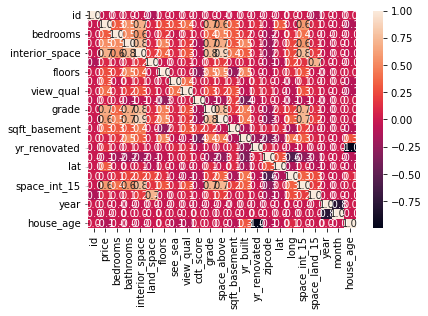

In [210]:
sns.heatmap(df.corr(), annot=True, fmt=".01f")
plt.show()

In [211]:
df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame()


,price
price,1.000000
interior_space,0.702035
grade,0.667434
space_above,0.605567
space_int_15,0.585379
bathrooms,0.525138
view_qual,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


    0.9 to 1 positive or negative indicates a very strong correlation.
    0.7 to 0.9 positive or negative indicates a strong correlation.
    0.5 to 0.7 positive or negative indicates a moderate correlation.
    0.3 to 0.5 positive or negative indicates a weak correlation.
    0 to 0.3 positive or negative indicates a negligible correlation.
    (source internet , à prendre avec des pincettes)

In [212]:
# création de la colonne mois 
df['month']=df.date.dt.month

In [213]:
df

,id,date,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,...,yr_built,yr_renovated,zipcode,lat,long,space_int_15,space_land_15,year,month,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,1955
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,40
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,1933
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,1965
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,2009
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,2014
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,2009
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,2004


In [214]:
len(df.zipcode.unique())

70

In [215]:
df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
interior_space,0.702035
grade,0.667434
space_above,0.605567
space_int_15,0.585379
bathrooms,0.525138
view_qual,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [216]:
df['zipcode'] = df['zipcode'].astype('str')

In [217]:
df_house_zipcode=pd.get_dummies(df)
df_house_zipcode

,id,date,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
df_house_zipcode.info

<bound method DataFrame.info of                id       date     price  bedrooms  bathrooms  interior_space  \
0      7129300520 2014-10-13  221900.0         3       1.00            1180   
1      6414100192 2014-12-09  538000.0         3       2.25            2570   
2      5631500400 2015-02-25  180000.0         2       1.00             770   
3      2487200875 2014-12-09  604000.0         4       3.00            1960   
4      1954400510 2015-02-18  510000.0         3       2.00            1680   
...           ...        ...       ...       ...        ...             ...   
21608   263000018 2014-05-21  360000.0         3       2.50            1530   
21609  6600060120 2015-02-23  400000.0         4       2.50            2310   
21610  1523300141 2014-06-23  402101.0         2       0.75            1020   
21611   291310100 2015-01-16  400000.0         3       2.50            1600   
21612  1523300157 2014-10-15  325000.0         2       0.75            1020   

       land_space  

In [219]:
corr=df_house_zipcode[df_house_zipcode.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame().head(95)

In [220]:
corr

,price
price,1.000000
interior_space,0.702035
grade,0.667434
space_above,0.605567
space_int_15,0.585379
...,...
zipcode_98168,-0.091665
zipcode_98001,-0.092179
zipcode_98042,-0.100370
zipcode_98023,-0.106093


In [221]:
(np.abs(corr['price']).sort_values(ascending=False).head(30))

price             1.000000
interior_space    0.702035
grade             0.667434
space_above       0.605567
space_int_15      0.585379
bathrooms         0.525138
view_qual         0.397293
sqft_basement     0.323816
bedrooms          0.308350
lat               0.307003
zipcode_98004     0.271131
see_sea           0.266369
floors            0.256794
zipcode_98039     0.212558
zipcode_98040     0.204873
zipcode_98112     0.169842
zipcode_98006     0.133695
yr_renovated      0.126434
house_age         0.119683
zipcode_98023     0.106093
zipcode_98033     0.102556
zipcode_98042     0.100370
zipcode_98001     0.092179
zipcode_98168     0.091665
zipcode_98105     0.090974
land_space        0.089661
zipcode_98075     0.088676
zipcode_98199     0.083659
space_land_15     0.082447
zipcode_98002     0.080300
Name: price, dtype: float64

In [222]:
y = df_house_zipcode.price

In [223]:
cor_matrix = df_house_zipcode.corrwith(y).abs()
print(cor_matrix)


id                0.016762
price             1.000000
bedrooms          0.308350
bathrooms         0.525138
interior_space    0.702035
                    ...   
zipcode_98177     0.040507
zipcode_98178     0.069242
zipcode_98188     0.054409
zipcode_98198     0.074025
zipcode_98199     0.083659
Length: 92, dtype: float64


In [224]:
cor_matrix.sort_values(ascending = False)

price             1.000000
interior_space    0.702035
grade             0.667434
space_above       0.605567
space_int_15      0.585379
                    ...   
zipcode_98034     0.008077
zipcode_98024     0.006756
zipcode_98065     0.003985
year              0.003576
zipcode_98136     0.003507
Length: 92, dtype: float64

In [225]:
indexes = cor_matrix.index

In [226]:
listem =list(indexes)

In [227]:
print(list(indexes))

['id', 'price', 'bedrooms', 'bathrooms', 'interior_space', 'land_space', 'floors', 'see_sea', 'view_qual', 'cdt_score', 'grade', 'space_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'space_int_15', 'space_land_15', 'year', 'month', 'house_age', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'z

In [228]:
aze = cor_matrix.tolist()

In [229]:
aze

[0.016762196614445116,
 1.0,
 0.3083495981456382,
 0.5251375054139615,
 0.7020350546118004,
 0.08966086058710013,
 0.25679388755071847,
 0.2663694340306022,
 0.3972934882945045,
 0.0363617891289975,
 0.6674342560202366,
 0.6055672983560783,
 0.32381602071198345,
 0.05401153149479271,
 0.12643379344089314,
 0.3070034799952186,
 0.021626241039306694,
 0.5853789035795679,
 0.08244715251948591,
 0.0035760408824667645,
 0.010080812107396258,
 0.11968266195769645,
 0.09217919003550293,
 0.0802997959399526,
 0.076761030658726,
 0.27113059801028666,
 0.06511368540015507,
 0.13369489335068177,
 0.017000162581673216,
 0.033075860016937,
 0.02162114168038244,
 0.012927010074704154,
 0.01747849413023299,
 0.02957720777569072,
 0.06394250111943053,
 0.1060934527442814,
 0.0067560124988633044,
 0.02920142889787336,
 0.024349966419448556,
 0.024269888568399747,
 0.07273700853129858,
 0.07393919941727913,
 0.05999782528007054,
 0.10255556651473717,
 0.008076624569149028,
 0.07904447925332013,
 0.21255

In [230]:
len(aze)

92

on peut enfin creer la liste de colonne a enlever
il y avait des méthodes plus simple


In [231]:
to_drop = [cor_matrix.index[i] for i in range(len((aze))) if cor_matrix[i] < 0.12]
print(); print(to_drop)
print(len(to_drop))


['id', 'land_space', 'cdt_score', 'yr_built', 'long', 'space_land_15', 'year', 'month', 'house_age', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98005', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133

In [232]:
df_clear=df_house_zipcode.drop(to_drop, axis = 1)

on a creer un dataset avec les données les plus correler au prix 
on peut encore enlever les donnée fort correlé entre eux 
en reprenant le code fait avec les iris

In [233]:
df_house_zipcode

,id,date,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
df_clear = df_clear.drop("date",axis = 1)

In [235]:
moyenne = df_clear.mean()

In [236]:
moyenne['price']

540088.1417665294

In [237]:
df

,id,date,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,...,yr_built,yr_renovated,zipcode,lat,long,space_int_15,space_land_15,year,month,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,1955
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,40
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,1933
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,1965
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,2009
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,2014
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,2009
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,2004


In [238]:
df.loc[df['bedrooms']==0]

,id,date,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,...,yr_built,yr_renovated,zipcode,lat,long,space_int_15,space_land_15,year,month,house_age
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,1990,0,98102,47.6362,-122.322,2360,4000,2014,6,1990
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,2006,0,98133,47.7145,-122.356,1470,1399,2015,2,2006
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,1999,0,98125,47.7222,-122.290,1430,1650,2014,8,1999
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,1953,0,98118,47.5260,-122.261,2170,6000,2014,10,1953
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,1990,0,98053,47.6642,-122.069,4740,35061,2014,6,1990
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,1985,0,98042,47.3473,-122.151,2500,8751,2014,11,1985
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,2003,0,98038,47.3493,-122.053,1810,5685,2014,9,2003
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,1990,0,98031,47.4095,-122.168,2520,8050,2015,4,1990
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,1996,0,98065,47.5265,-121.828,1060,7200,2014,12,1996
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,1999,0,98065,47.5261,-121.826,1500,4675,2015,2,1999


Il y a des maison sans chambre , ma question on peut se poser c'est si on doit les enlever

In [239]:
df.loc[df['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,interior_space,land_space,floors,see_sea,view_qual,...,yr_built,yr_renovated,zipcode,lat,long,space_int_15,space_land_15,year,month,house_age
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,1990,0,98102,47.6362,-122.322,2360,4000,2014,6,1990
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,1966,0,98022,47.2638,-121.906,1160,42882,2015,2,1966
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,2006,0,98133,47.7145,-122.356,1470,1399,2015,2,2006
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,1950,0,98045,47.5316,-121.749,990,22549,2014,11,1950
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,1990,0,98053,47.6642,-122.069,4740,35061,2014,6,1990
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,1990,0,98031,47.4095,-122.168,2520,8050,2015,4,1990
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,1996,0,98065,47.5265,-121.828,1060,7200,2014,12,1996
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,1948,0,98053,47.6429,-121.955,1690,19290,2014,9,1948
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,1913,0,98001,47.2781,-122.250,1380,9600,2015,4,1913
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1963,0,98024,47.5308,-121.888,1620,22850,2014,9,1963


Il y a des maison sans chambre et sans salle de bain , des garages aménagé ?

In [240]:
df_clear.to_csv("df_clear.csv", index = False)

In [241]:
df_clear

,price,bedrooms,bathrooms,interior_space,floors,see_sea,view_qual,grade,space_above,sqft_basement,yr_renovated,lat,space_int_15,zipcode_98004,zipcode_98006,zipcode_98039,zipcode_98040,zipcode_98112
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,0,0,0,0,0
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1530,0,0,0,0,0
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,1830,0,0,0,0,0
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,1020,0,0,0,0,0
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1410,0,0,0,0,0


In [242]:
df_clear

,price,bedrooms,bathrooms,interior_space,floors,see_sea,view_qual,grade,space_above,sqft_basement,yr_renovated,lat,space_int_15,zipcode_98004,zipcode_98006,zipcode_98039,zipcode_98040,zipcode_98112
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,0,0,0,0,0
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1530,0,0,0,0,0
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,1830,0,0,0,0,0
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,1020,0,0,0,0,0
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1410,0,0,0,0,0


on va enfin mettre en CSV les nouveaux tableaux

In [243]:
df_cleared = df_clear.drop("price", axis  = 1)

In [244]:
df_cleared.to_csv("df_cleared.csv", index = False)

In [245]:
df_clear

,price,bedrooms,bathrooms,interior_space,floors,see_sea,view_qual,grade,space_above,sqft_basement,yr_renovated,lat,space_int_15,zipcode_98004,zipcode_98006,zipcode_98039,zipcode_98040,zipcode_98112
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,0,0,0,0,0
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1530,0,0,0,0,0
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,1830,0,0,0,0,0
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,1020,0,0,0,0,0
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1410,0,0,0,0,0


In [246]:
df_cleared.columns

Index(['bedrooms', 'bathrooms', 'interior_space', 'floors', 'see_sea',
       'view_qual', 'grade', 'space_above', 'sqft_basement', 'yr_renovated',
       'lat', 'space_int_15', 'zipcode_98004', 'zipcode_98006',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98112'],
      dtype='object')

In [247]:
df_cleared.info

<bound method DataFrame.info of        bedrooms  bathrooms  interior_space  floors  see_sea  view_qual  grade  \
0             3       1.00            1180     1.0        0          0      7   
1             3       2.25            2570     2.0        0          0      7   
2             2       1.00             770     1.0        0          0      6   
3             4       3.00            1960     1.0        0          0      7   
4             3       2.00            1680     1.0        0          0      8   
...         ...        ...             ...     ...      ...        ...    ...   
21608         3       2.50            1530     3.0        0          0      8   
21609         4       2.50            2310     2.0        0          0      8   
21610         2       0.75            1020     2.0        0          0      7   
21611         3       2.50            1600     2.0        0          0      8   
21612         2       0.75            1020     2.0        0          0      7